In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

In [2]:
def country_death(country):
    df = pd.read_csv("Death_"+country+"_03_13.csv", index_col=False)
    df = df[["year", "best_est"]]
    df = df.astype("int64")
    df["country"] = country
    mask = (2003 <= df["year"]) & (2013 >= df["year"])
    df= df[mask]
    df = df.set_index(["country", "year"])
    df= df.rename(columns = {'best_est':'deaths'})
    df = df.groupby(level=[0,1]).sum()
    return df

In [3]:
country_list = ["Iraq", "Afghanistan", "Mexico", "Pakistan"]
death_df = pd.DataFrame()
for country in country_list:
    c_death = country_death(country)
    death_df = pd.concat([death_df, c_death])
death_df


deaths
country     year        
Iraq        2003    7999
            2004    4365
            2005    3521
            2006    4609
            2007    4489
            2008    2732
            2009    1718
            2010    1851
            2011    1394
            2012    1407
            2013    4011
Afghanistan 2003     944
            2004     817
            2005    1711
            2006    4982
            2007    7020
            2008    5660
            2009    6499
            2010    7151
            2011    7565
            2012    7822
            2013    8131
Mexico      2004     220
            2005     187
            2006     686
            2007     610
            2008    1869
            2009    2263
            2010    3313
            2011    2715
            2012    1699
            2013     776
Pakistan    2003     241
            2004     430
            2005     153
            2006     427
            2007    1366
            2008    4620
            2009    7460
            2010    7226
            2011    3474
            2012    3540
            2013    2902

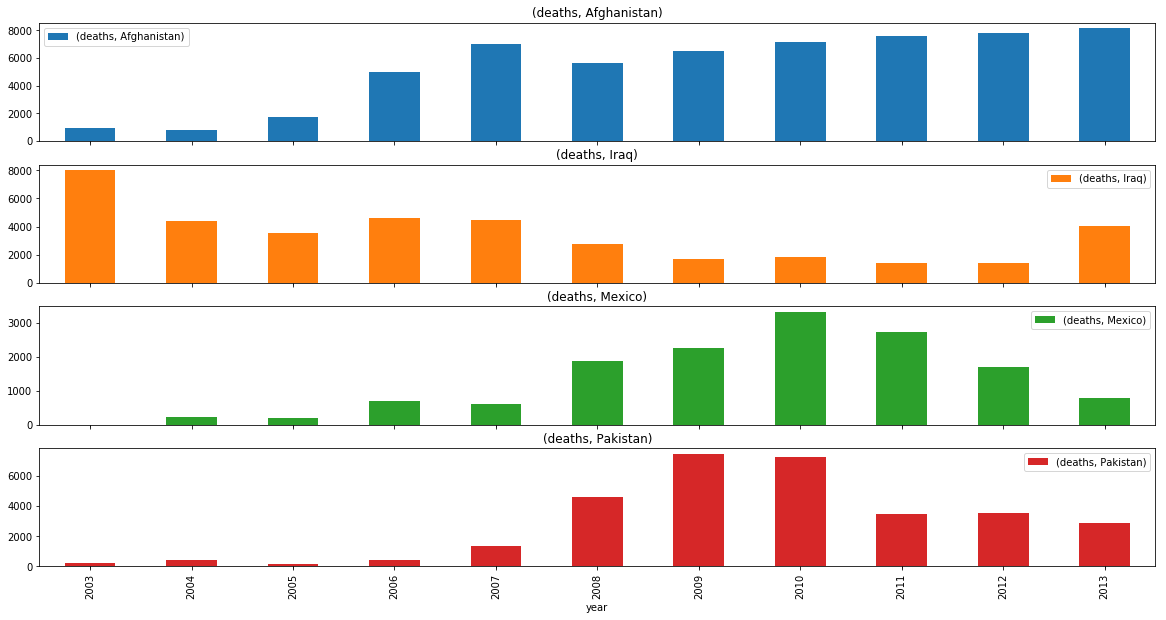

In [4]:

death_df.unstack(level=0).plot(kind='bar', subplots=True, figsize=(20,10))

plt.show()

In [5]:
pq.read_table("niro.parquet")

ArrowIOError: Failed to open local file: niro.parquet , error: No such file or directory